In [8]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import madule.utils
import arviz as az
import nest_asyncio

In [4]:

# List of subjects
subList = ['sub-004', 'sub-020', 'sub-012', 'sub-020', 'sub-025', 'sub-026', 'sub-029',
           'sub-030', 'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042',
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059',
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071'
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080',
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089',
           'sub-090', 'sub-092', 'sub-108', 'sub-109']

# Simulation number
simNumber = 1
# If you want to model fit or just recall ex model fit
modelFit = True
# Number of chains in MCMC procedure
n_chains = 10
# The number of iteration or samples for each chain in MCM procedure
n_samples=1000
# Name of subject
subName = subList[0]
# Main directory of the subject
subMainDirec = 'data/originalfMRIbehFiles/'


# Making empty Dataframe to be concatenated for all four .csv file of the subject
parent_dir  = '../data/simulation/'+ subName + '/' + str(simNumber) + '/'
# Read predefined task design with true parameters
data = pd.read_csv(parent_dir + subName +'-simulated-data-with-task-design-true-param.csv')

# Put required data for stan model
dataStan = {'N':int(data.shape[0]),  
            'nCond':2, 
            'nSes':2, 
            'pushed':np.array(data.pushed).astype(int),  
            'yellowChosen':np.array(data.yellowChosen).astype(int), 
            'winAmtPushable':np.array(data.winAmtPushable).astype(int), 
            'winAmtYellow':np.array(data.winAmtYellow).astype(int), 
            'rewarded':np.array(data.correctChoice).astype(int),       
            'session':np.array(data.session).astype(int), 
            'cond':np.array(data.block.replace('Act',1).replace('Stim',2)).astype(int),  
            'p_push_init':.5, 
            'p_yell_init':.5}

# Loading the RL Stan Model
file_name = 'stan_models/inv_RLActClr.stan' 
file_read = open(file_name, 'r')
stan_model = file_read.read()

In [5]:
# Use nest-asyncio.This package is needed because Jupter Notebook blocks the use of certain asyncio functions
nest_asyncio.apply()
# Building Stan Model realted to our proposed model
posterior = stan.build(stan_model, data = dataStan)
# Start for taking samples from parameters in the Stan Model
fit = posterior.sample(num_chains=n_chains, num_samples=n_samples)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan__y_thmc0/model_irbr7ohr.stan', line 9, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan__y_thmc0/model_irbr7ohr.stan', line 10, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan__y_thmc0/model_irbr7ohr.stan', line 11, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-form

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_xjx834xa/model_irbr7ohr.stan', line 101, column 6 to column 37)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 0.0005 seconds
  1000 transitions using 10 leapfrog steps per transition would take 5 seconds.
  Adjust your expectations accordi

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 0.000511 seconds
  1000 transitions using 10 leapfrog steps per transition would take 5.11 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_xjx834xa/model_irbr7ohr.stan', line 101, column 6 to column 37)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis pr

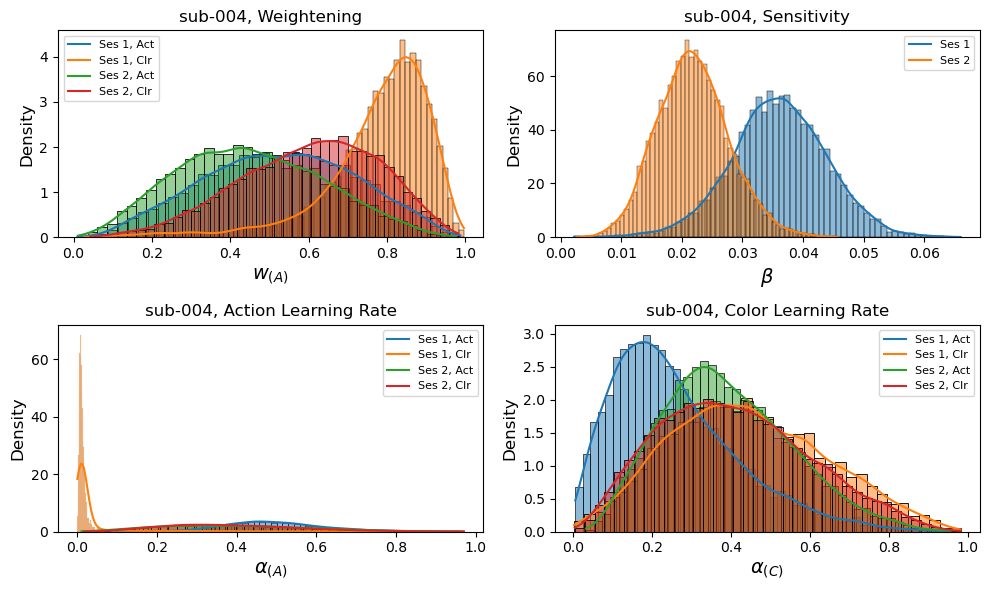

In [6]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_ = fit["alphaAct_"] 
alphaClr_ = fit["alphaClr_"] 
weightAct_ = fit["weightAct_"] 
beta_ = fit["beta_"] 

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weightAct_[0, 0], kde=True, stat='density')
sns.histplot(weightAct_[0, 1], kde=True, stat='density')
sns.histplot(weightAct_[1, 0], kde=True, stat='density')
sns.histplot(weightAct_[1, 1], kde=True, stat='density')
plt.title(subName + ', Weightening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.legend(['Ses 1, Act', 'Ses 1, Clr', 'Ses 2, Act', 'Ses 2, Clr'], fontsize=8)


# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(beta_[0], kde=True, stat='density')
sns.histplot(beta_[1], kde=True, stat='density')
plt.title(subName + ', Sensitivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\beta$', fontsize=14)
plt.legend(['Ses 1', 'Ses 2'], fontsize=8)


# Action Learning Rate
fig.add_subplot(rows, columns, 3)
sns.histplot(alphaAct_[0, 0], kde=True, stat='density')
sns.histplot(alphaAct_[0, 1], kde=True, stat='density')
sns.histplot(alphaAct_[1, 0], kde=True, stat='density')
sns.histplot(alphaAct_[1, 1], kde=True, stat='density')
plt.title(subName + ', Action Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(A)} $', fontsize=14)
plt.legend(['Ses 1, Act', 'Ses 1, Clr', 'Ses 2, Act', 'Ses 2, Clr'], fontsize=8)

# Color Learning Rate
fig.add_subplot(rows, columns, 4)
sns.histplot(alphaClr_[0, 0], kde=True, stat='density')
sns.histplot(alphaClr_[0, 1], kde=True, stat='density')
sns.histplot(alphaClr_[1, 0], kde=True, stat='density')
sns.histplot(alphaClr_[1, 1], kde=True, stat='density')
plt.title(subName + ', Color Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(C)} $', fontsize=14)
plt.legend(['Ses 1, Act', 'Ses 1, Clr', 'Ses 2, Act', 'Ses 2, Clr'], fontsize=8)

plt.subplots_adjust(wspace=10.)

#fig.savefig(subMainDirec + subName + '/' + subName +'_inv_rlActClr.png', dpi=300)

In [9]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"alphaAct_[0, 0]",0.491,0.120,0.277,0.726,0.001,0.001,6702.0,5762.0,1.0
"alphaAct_[0, 1]",0.034,0.085,0.001,0.139,0.002,0.002,2881.0,1485.0,1.0
"alphaAct_[1, 0]",0.393,0.180,0.082,0.724,0.002,0.001,10656.0,7759.0,1.0
"alphaAct_[1, 1]",0.385,0.162,0.096,0.679,0.002,0.001,10552.0,7440.0,1.0
"alphaClr_[0, 0]",0.258,0.159,0.014,0.552,0.002,0.001,5388.0,5317.0,1.0
...,...,...,...,...,...,...,...,...,...
soft_max_EV[331],0.440,0.045,0.356,0.521,0.000,0.000,11148.0,7636.0,1.0
soft_max_EV[332],0.400,0.036,0.327,0.464,0.000,0.000,8757.0,6555.0,1.0
soft_max_EV[333],0.479,0.032,0.420,0.537,0.000,0.000,10270.0,6952.0,1.0
soft_max_EV[334],0.719,0.066,0.599,0.842,0.001,0.001,7761.0,6692.0,1.0
